**Project GOAL**:

1. Analyze historical auto sales data from Kaggle.

2. Develop, train and evaluate different training methods for SARIMAX Timeseries Model

3. Export results for presensations in PowerBi


Data Source: Kaggle

# Import Statement

In [3]:
# !pip install country_converter

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as cc

# Wrangle Function

In [6]:
def wrangle(filepath):
  """
  This function reads a CSV file and returns a cleaned DataFrame.

  Parameters:
    filepath (str): The path to the CSV file.

  Returns:
    pandas.DataFrame: A cleaned DataFrame.

  """
  # Read CSV file
  df = pd.read_csv(filepath)

  # To ensure numerical data are formatted to 2 decimal place
  pd.options.display.float_format = '{:,.2f}'.format

  # removing irrelevent columns
  irre_cols = ['CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'ADDRESSLINE1', 'PHONE']
  df.drop(columns=irre_cols, inplace=True)

  # coverting to datetime and extracting the year date
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True)
  df['Year'] = df['ORDERDATE'].dt.year


  # Creating Iso3 Code column
  df['ISO3'] = cc.convert(df['COUNTRY'], to='ISO3')


  return df


In [7]:
df = wrangle('Auto Sales data.csv')
print(df.shape)
df.head()

(2747, 18)


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2 2,871.00   
1        10121               34      81.35                5 2,765.90   
2        10134               41      94.74                2 3,884.34   
3        10145               45      83.26                6 3,746.70   
4        10168               36      96.66                1 3,479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME        CITY POSTALCODE COUNTRY DEALSIZE  Year ISO3  
0     Land of Toys Inc.         NYC      10022     USA    Small  2018  USA  
1    Reims Collectables       Reims      51100  France    Small  2018  FRA  
2       Lyon Souveniers       Paris      75508  France   Medium  2018  FRA  
3     Toys4GrownUps.com    Pasadena      90003     USA   Medium  2018  USA  
4  Technics Stores Inc.  Burlingame      94217     USA   Medium  2018  USA

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  CITY                  2747 non-null   object        
 13  POSTALCODE        

In [14]:
# Extract cleaned data for futher analysis in Power Bi
# df.to_csv('Autosale_data_frmpy.csv', index=False)

# EDA 1 (Data analytics)
Just a brief exploratory data analysis

## Sales Analysis (focus on productline)
Task

1. I would like to look at the top selling productline vs the revenue acrued(total sales)

2. Top 5 customers and the product line they buy

In [17]:
df.PRODUCTLINE.nunique()

7

In [18]:
# highest selling productline (quantity)
high_demand = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)
high_demand

PRODUCTLINE
Classic Cars        33373
Vintage Cars        20059
Motorcycles         11080
Planes              10636
Trucks and Buses    10579
Ships                7989
Trains               2712
Name: QUANTITYORDERED, dtype: int64

In [19]:
# highest selling productline (revenue)
sales_revemue = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sales_revemue

PRODUCTLINE
Classic Cars       3,842,868.54
Vintage Cars       1,806,675.68
Trucks and Buses   1,111,559.19
Motorcycles        1,103,512.19
Planes               969,323.42
Ships                700,039.22
Trains               226,243.47
Name: SALES, dtype: float64

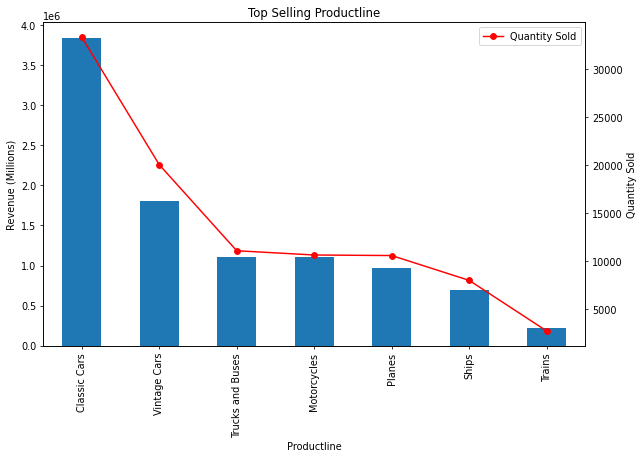

In [20]:
# Visualising heighest selling productline (revenue & Quantity)
plt.figure(figsize=(10, 6), dpi=70)
ax1 = plt.gca()
ax2 = plt.twinx()
high_demand.plot(ax = ax2, color='r', label="Quantity Sold", marker='o')


sales_revemue.plot(kind='bar', title='Top Selling Productline', ax=ax1)
ax1.set_ylabel('Revenue (Millions)')
ax2.set_ylabel('Quantity Sold')
ax1.set_xlabel('Productline')
plt.xticks(rotation=45)
plt.legend()
plt.show();

So obvious. Classic and Vintage have the highest quantity of autos ordered, likewise the heighest revenue generation.

Let consider the top 5 customers, and the productline they buy the most

In [23]:
# Top 5 customers and revenue generated
top5_customers = (df[['CUSTOMERNAME', 'SALES']]
                   .groupby(['CUSTOMERNAME'])
                   .sum()
                   .sort_values('SALES', ascending=False)
                   .head(5))
top5_customers

SALES
CUSTOMERNAME                           
Euro Shopping Channel        912,294.11
Mini Gifts Distributors Ltd. 654,858.06
Australian Collectors, Co.   200,995.41
Muscle Machine Inc           197,736.94
La Rochelle Gifts            180,124.90

Visualization of top 5 customers

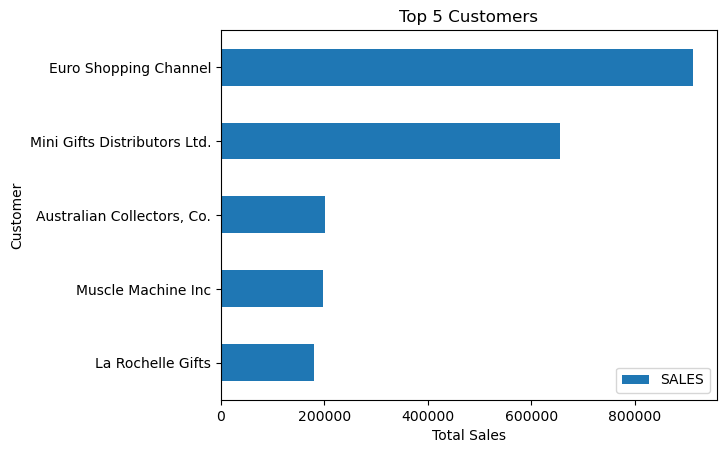

In [25]:
top5_customers.sort_values(by='SALES').plot(kind='barh', title='Top 5 Customers')
plt.ylabel('Customer')
plt.xlabel('Total Sales')
plt.show()

In [26]:
# Filtering to obtain data containing just the top 5 customers
mask = df['CUSTOMERNAME'].isin(top5_customers.index)
df_top5_customers = df[mask]
df_top5_customers.head()


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
8         10223               37     107.18                1  3,965.66   
12        10275               45      92.83                1  4,177.35   
20        10375               21      34.91               12    733.11   
23        10417               66     113.88                2  7,516.08   
42        10312               48     242.16                3 11,623.70   

    ORDERDATE  DAYS_SINCE_LASTORDER    STATUS   PRODUCTLINE  MSRP PRODUCTCODE  \
8  2019-02-20                   475   Shipped   Motorcycles    95    S10_1678   
12 2019-07-23                   326   Shipped   Motorcycles    95    S10_1678   
20 2020-02-03                   139   Shipped   Motorcycles    95    S10_1678   
23 2020-05-13                    42  Disputed   Motorcycles    95    S10_1678   
42 2019-10-21                   266   Shipped  Classic Cars   214    S10_1949   

                    CUSTOMERNAME        CITY POSTALCODE    COUNTRY DEALSIZE  \
8     Australian Collectors, Co.   Melbourne       3004  Australia   Medium   
12             La Rochelle Gifts      Nantes      44000     France   Medium   
20             La Rochelle Gifts      Nantes      44000     France    Small   
23         Euro Shopping Channel      Madrid      28034      Spain    Large   
42  Mini Gifts Distributors Ltd.  San Rafael      97562        USA    Large   

    Year ISO3  
8   2019  AUS  
12  2019  FRA  
20  2020  FRA  
23  2020  ESP  
42  2019  USA

In [27]:
# Aggregating the top 5 customers to show the productline the order the most
grp_productline = (df_top5_customers
                   .groupby(['CUSTOMERNAME', 'PRODUCTLINE'])['QUANTITYORDERED']
                   .sum()
                   .sort_values(ascending=False)
                   .reset_index())
grp_productline[:5]

CUSTOMERNAME   PRODUCTLINE  QUANTITYORDERED
0         Euro Shopping Channel  Classic Cars             3816
1  Mini Gifts Distributors Ltd.  Classic Cars             2381
2  Mini Gifts Distributors Ltd.  Vintage Cars             1753
3         Euro Shopping Channel  Vintage Cars             1596
4            Muscle Machine Inc  Classic Cars             1271

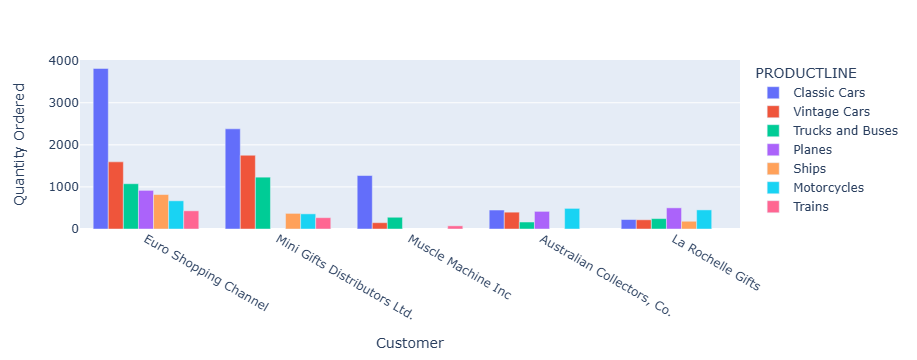

In [28]:
grp_prl = px.bar(grp_productline,
                 x='CUSTOMERNAME',
                 y='QUANTITYORDERED',
                 color='PRODUCTLINE',
                 barmode='group')
grp_prl.update_layout(xaxis_title='Customer', yaxis_title='Quantity Ordered')
grp_prl.show()

All top customers have Classic cars and Vintage cars as part of their most ordered productline except La Rochelle Gifts whose highest deals are in Planes and motorcycles

## Demographic of the top 5 customers

In [31]:
# Creating Iso3 Code column
df['ISO3'] = cc.convert(df['COUNTRY'], to='ISO3')
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2 2,871.00   
1        10121               34      81.35                5 2,765.90   
2        10134               41      94.74                2 3,884.34   
3        10145               45      83.26                6 3,746.70   
4        10168               36      96.66                1 3,479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME        CITY POSTALCODE COUNTRY DEALSIZE  Year ISO3  
0     Land of Toys Inc.         NYC      10022     USA    Small  2018  USA  
1    Reims Collectables       Reims      51100  France    Small  2018  FRA  
2       Lyon Souveniers       Paris      75508  France   Medium  2018  FRA  
3     Toys4GrownUps.com    Pasadena      90003     USA   Medium  2018  USA  
4  Technics Stores Inc.  Burlingame      94217     USA   Medium  2018  USA

In [32]:
# creating data for choropleth map
choro_data = (df[['CUSTOMERNAME', 'SALES', 'ISO3']]
             .groupby(['ISO3', 'CUSTOMERNAME'])['SALES']
             .sum()
             .reset_index())
choro_data.head()

ISO3                  CUSTOMERNAME      SALES
0  AUS       Anna's Decorations, Ltd 153,996.13
1  AUS  Australian Collectables, Ltd  64,591.46
2  AUS    Australian Collectors, Co. 200,995.41
3  AUS   Australian Gift Network, Co  59,469.12
4  AUS     Souveniers And Things Co. 151,570.98

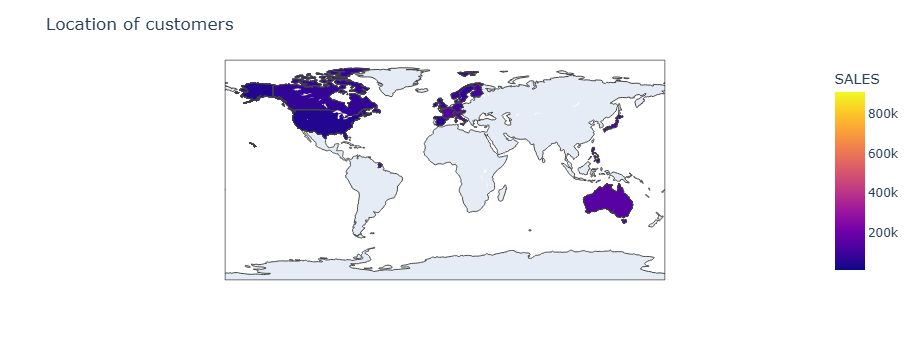

In [33]:
vis = px.choropleth(choro_data,
                    locations='ISO3',
                    color='SALES',
                    hover_name='CUSTOMERNAME',
                    )
vis.update_layout(title='Location of customers',
                 coloraxis_showscale= True)
vis.show()

In [34]:
# Aggregate sales per customer, year and product line
sales_by_customer_product = (
    df.groupby(['Year', 'CUSTOMERNAME', 'PRODUCTLINE'])['QUANTITYORDERED']
    .sum().reset_index()
    )
sales_by_customer_product.sort_values(by='QUANTITYORDERED', ascending=False)

sales_by_customer_product.head()

Year    CUSTOMERNAME   PRODUCTLINE  QUANTITYORDERED
0  2018  AV Stores, Co.  Classic Cars              297
1  2018  AV Stores, Co.  Vintage Cars              273
2  2018    Alpha Cognac  Classic Cars              126
3  2018    Alpha Cognac        Planes              218
4  2018    Alpha Cognac         Ships               75

In [35]:
# Filter out top 10 customers from the sales_by_customer_product table above
top10_customers = (df[['CUSTOMERNAME', 'SALES']]
                   .groupby(['CUSTOMERNAME'], as_index=False)
                   .sum()
                   .sort_values('SALES', ascending=False)
                   .head(10))

mask = sales_by_customer_product['CUSTOMERNAME'].isin(top10_customers['CUSTOMERNAME'])
top10_customers_ = sales_by_customer_product[mask]
top10_customers_.head()

Year             CUSTOMERNAME   PRODUCTLINE  QUANTITYORDERED
0  2018           AV Stores, Co.  Classic Cars              297
1  2018           AV Stores, Co.  Vintage Cars              273
6  2018  Anna's Decorations, Ltd  Classic Cars              621
7  2018  Anna's Decorations, Ltd   Motorcycles              219
8  2018  Anna's Decorations, Ltd  Vintage Cars               34

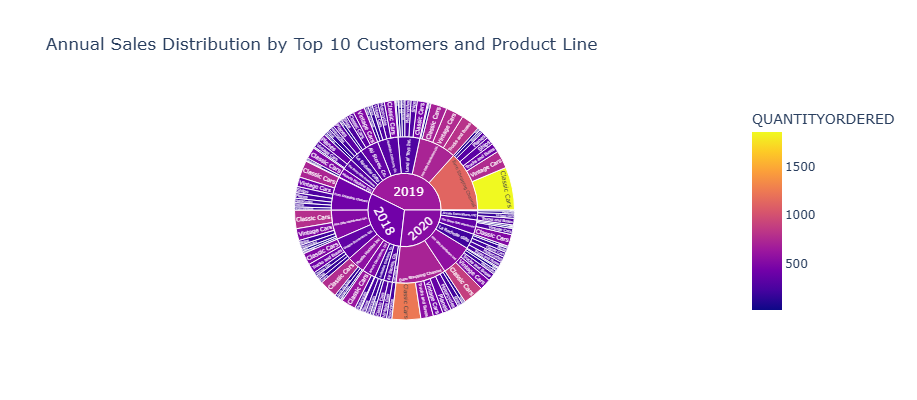

<Figure size 1500x800 with 0 Axes>

In [36]:
# Create the sunburst chart
plt.figure(figsize=(15, 8))
sunfg = px.sunburst(top10_customers_,
                  path=['Year', 'CUSTOMERNAME', 'PRODUCTLINE'],
                  values='QUANTITYORDERED',
                  color='QUANTITYORDERED',
                  title='Annual Sales Distribution by Top 10 Customers and Product Line')
sunfg.update_layout(title='Annual Sales Distribution by Top 10 Customers and Product Line',
                    coloraxis_showscale=True, width=700, height=400)
sunfg.show()


I actually love sunburst analysis because of its pie chart-like display. We can quickly identify the customer with the largest order proportion as well as the productline they buy in each year.

# 2. Sales Forecast Using SARIMAX

## Import Dependencies

In [12]:
# !pip install pmdarima

In [13]:
# Import TSA tool
from statsmodels.tsa.seasonal import seasonal_decompose # to check for trend, seasonality and residuals
from statsmodels.tsa.stattools import adfuller # to check for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # to help decide hyper-parameters tunning
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')


## Prepare Data for Modelling

In [15]:
data = df[['ORDERDATE', 'SALES']]  #isolating target column
data.set_index('ORDERDATE', inplace=True) #set date as index
data  = data.resample('W').sum() #resample to weekly
print(data.shape)
print(data.info())
data.describe()

(126, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2018-01-07 to 2020-05-31
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SALES   126 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None


SALES
count     126.00
mean   77,462.08
std    71,159.40
min         0.00
25%    25,029.00
50%    56,310.72
75%   112,201.56
max   326,198.34

## EDA for TSA Model

Let's explore the data for modelling insight

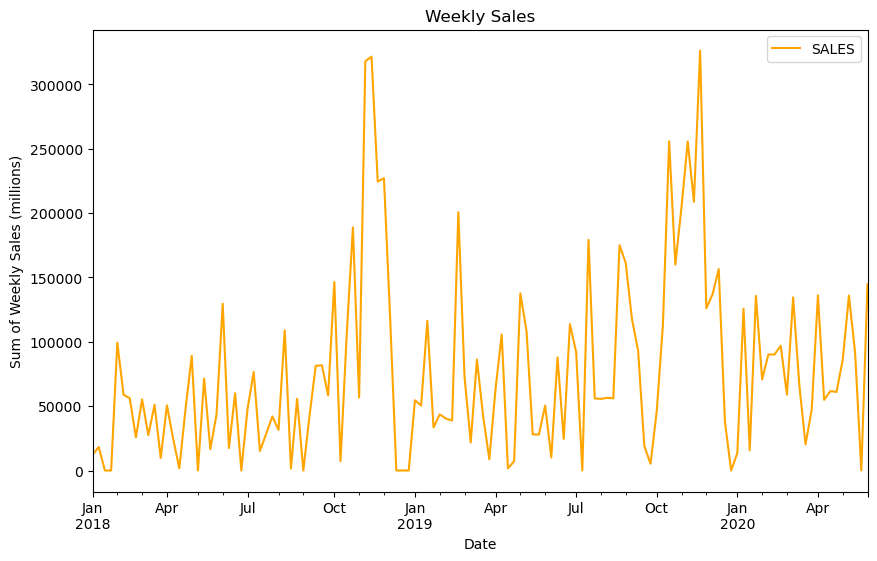

In [17]:
data.plot(title='Weekly Sales', figsize=(10, 6), color='orange')

plt.xlabel('Date')
plt.ylabel('Sum of Weekly Sales (millions)')
plt.show();

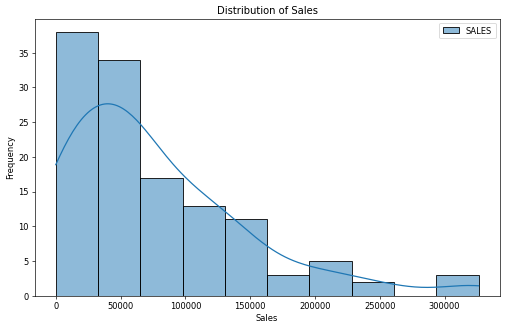

In [18]:
plt.figure(figsize=(10, 6), dpi=60)
sns.histplot(data, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show();

The data is positively skewed; which is expected of a typical sales data.
There appear to be a minimum outlier which suggests that there might be seasonality in the data.
Hopefully this won't have a negative impact on our model.

Let's check the box plot and resampling the data on a monthly frequency to further solidify the presence of seasonality

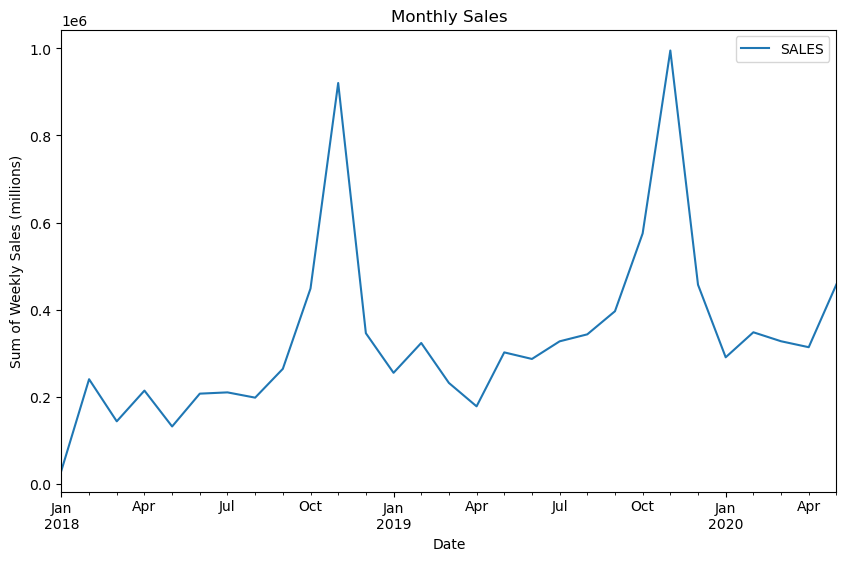

In [20]:
df_m= df.copy()
df_m = df_m[['ORDERDATE', 'SALES']]
df_m.set_index('ORDERDATE', inplace=True)
df_m  = data.resample('MS').sum()

df_m.plot(title='Monthly Sales', figsize=(10, 6))

plt.xlabel('Date')
plt.ylabel('Sum of Weekly Sales (millions)')
plt.show();

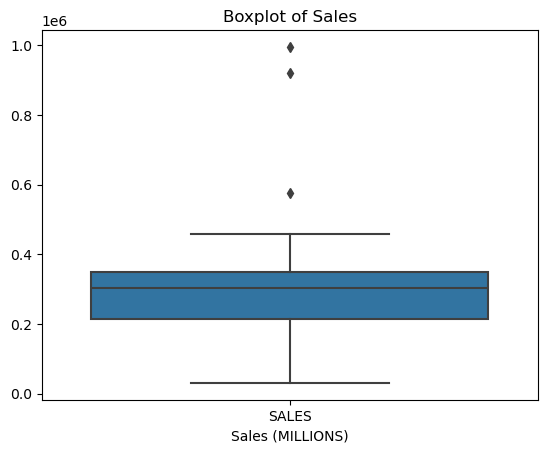

In [21]:
sns.boxplot(data=df_m)
plt.xlabel('Sales (MILLIONS)')
plt.title('Boxplot of Sales');

As expected there are peak sales between Sept and Dec of each year. This further shows the presence of seasonality in the dataset.
But for model training and evaluation purpose, I will be using `weekly frequency`

### Stationarity check

For this, I will use `adfuller` test, using `autoAIC` to determine the number of lags and slicing at position '1' to get the p-value

In [24]:
ad_test = adfuller(data, autolag='AIC')
result = ad_test[1]
print("Adfuller test p_value: %.4f" % result)

Adfuller test p_value: 0.0001


Accept Null hypothesis if p-value > 0.05

Reject Null hypothesis if p-value <= 0.05

p_value of my test `0.0001` is less than 0.05 , therefore my dataset is Stationary (Rejecting the null hypothesis)

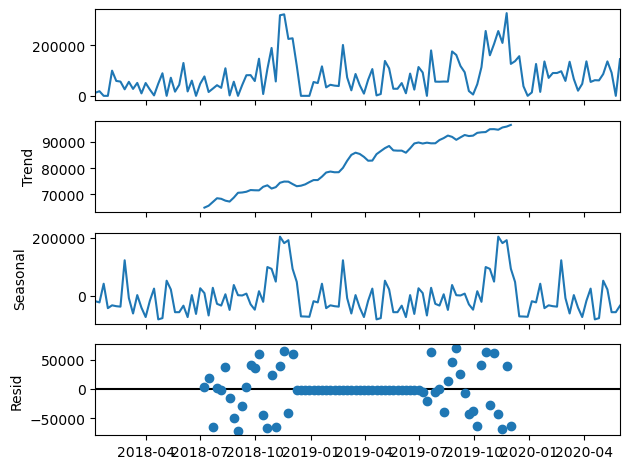

In [26]:
# Decomposing data to check for trend, seasonality and residuals
sn_decom = seasonal_decompose(data, model='additive')
sn_decom.plot();

### AUTO CORRELLATIONS
Checking for auto correlations to help decide our `AR` and `MA` hyperparameters

<Figure size 900x540 with 0 Axes>

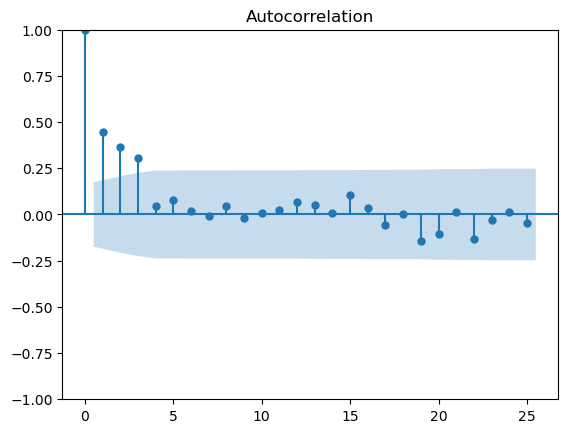

In [28]:
plt.figure(figsize=(10, 6), dpi=90)
plot_acf(data, lags=25)
plt.show()

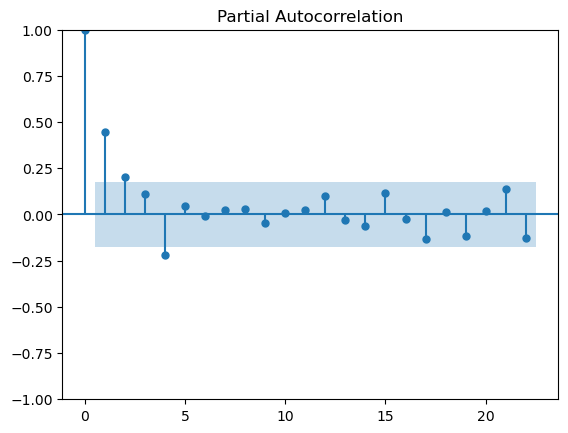

In [29]:
plot_pacf(data)
plt.show()

# Modelling

Looking at my dataset from the edA above, I think SARIMAX will be a suitable model.

I will be considering different iteration methods, while considering the best parameter order.

using the `PACF` and `ACF` plots above, order(4,0,1) seems to be appropriate for  `pdq`. But to get the best hyper tunning, I will be using different approaches to see which has the best metrics.

Residuals from each iterations will diagnosed for any auto correlations, and order opportunity to be harnessed


## Split Data
Dividing the dataset into training data and test data

In [32]:
factor = int(len(data)*0.80)
X_train = data[:factor]
y_test = data[factor:].squeeze()

print(X_train.shape)
print(y_test.shape)

(100, 1)
(26,)


## Model Training and Evaluations

### Using custom loop to get the best parameter to be used with `RMSE` as the metric.

In [35]:
#Returns a dataframe with the least rmse and it's curresponding parameters

def params_tunning(data, p, d, q) -> pd.DataFrame:
  import itertools

  # factor = int(len(data)*0.80)
  # X_train = data[:factor]
  # y_test = data[factor:].squeeze()

  p_u = range(0, p)
  d_u = range(0, d)
  q_u = range(0, q)
  order = list(itertools.product(p_u, d_u, q_u))

  orders = [] # list of parameters order
  errors = [] # list of rmse calculated
  aic_values = [] # list of aic calculated from the model
  for params in order:
    try:
      s_order = list(params) # converting the params tuple to a list
      s_order.append(12) # adding 12 months to make the seasonal order
      tuple(s_order)
      # model training
      model = SARIMAX(X_train,
                      order=params,
                      seasonal_order=s_order).fit(disp=0, maxiter=2000)
      # Predicting
      pred = model.forecast(len(y_test))
      error = np.sqrt(mean_squared_error(y_test, pred))
      orders.append(params)
      errors.append(error)
      aic_values.append(model.aic)
    except Exception as e:
      print(f"there is an error: {str(e)}")
      continue



  params_df = pd.DataFrame(data=zip(orders, errors, aic_values),
                          columns=['order', 'rmse', 'aics'])
  best_params = params_df[params_df['rmse'] == params_df['rmse'].min()]
  return best_params

In [36]:
# Initialiing the tunning function
param_func = params_tunning(data=data, p=4, d=1, q=4)
param_func

order      rmse     aics
11  (2, 0, 3) 53,944.37 2,520.08

After lots of tuning and fitting, I discovered order(4,0,0) would be the best parameters to use with a little tweek in the s_order params

I will be using 12 for my seasonality order even though my data freq is 52(weekly). This is because the data shows strong seasonality on monthly freq

In [38]:
model_cus_loop = SARIMAX(X_train, order=(4, 0, 0,), seasonal_order=(1, 1, 2, 12)).fit(disp=0, maxiter=2000)
pred_cus_loop = model_cus_loop.forecast(len(y_test))
pred_cus_loop.head()

2019-12-08   101,025.51
2019-12-15   116,201.56
2019-12-22    72,442.98
2019-12-29    26,712.64
2020-01-05    95,972.25
Freq: W-SUN, Name: predicted_mean, dtype: float64

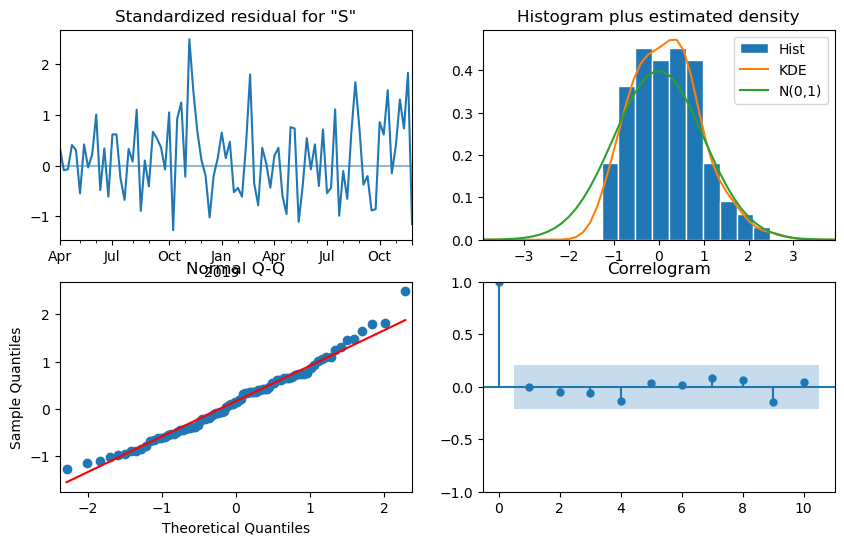

In [39]:
model_cus_loop.plot_diagnostics(figsize=(10, 6))
plt.show()

### Parameters Tuning using auto Arima
Auto Arima uses AIC as the metrics for selecting the best parameters

In [41]:
from pmdarima import auto_arima
model = auto_arima(X_train, seasonal=True, start_p=1, start_q=1, test='adf', max_p=5, max_q=5, d=2, m=12, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=2485.585, Time=0.44 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=2581.828, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=2536.019, Time=0.11 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2499.909, Time=0.29 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=2483.802, Time=0.48 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=2481.847, Time=0.24 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=2483.796, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=2498.067, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=2534.104, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[12]             : AIC=2472.966, Time=0.23 sec
 ARIMA(2,2,1)(1,0,0)[12]             : AIC=2474.746, Time=0.38 sec
 ARIMA(2,2,1)(0,0,1)[12]             : AIC=2474.767, Time=0.40 sec
 ARIMA(2,2,1)(1,0,1)[12]             : AIC=2476.412, Time=0.67 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=2494.439, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1232.483
Date:                Fri, 13 Dec 2024   AIC                           2472.966
Time:                        11:08:49   BIC                           2483.306
Sample:                    01-07-2018   HQIC                          2477.149
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5332      0.120     -4.443      0.000      -0.768      -0.298
ar.L2         -0.2424      0.154     -1.578      0.114      -0.543       0.059
ma.L1         -0.9895      0.133     -7.444      0.000      -1.250      -0.729
sigma2      6.329e+09   1.26e-11   5.02e+20      0.000    6.33e+09    6.33e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.51
Prob(Q):                              0.81   Prob(JB):                         0.10
Heteroskedasticity (H):               3.04   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+36. Standard errors may be unstable.
"""

In [42]:
model_auto_arima = SARIMAX(X_train, order=(2, 2, 1), seasonal_order=(0, 0, 0, 12)).fit(disp=0, maxiter=2000)
start = len(X_train)
end = start + len(y_test) - 1
pre_auto_arima = model_auto_arima.predict(start, end)

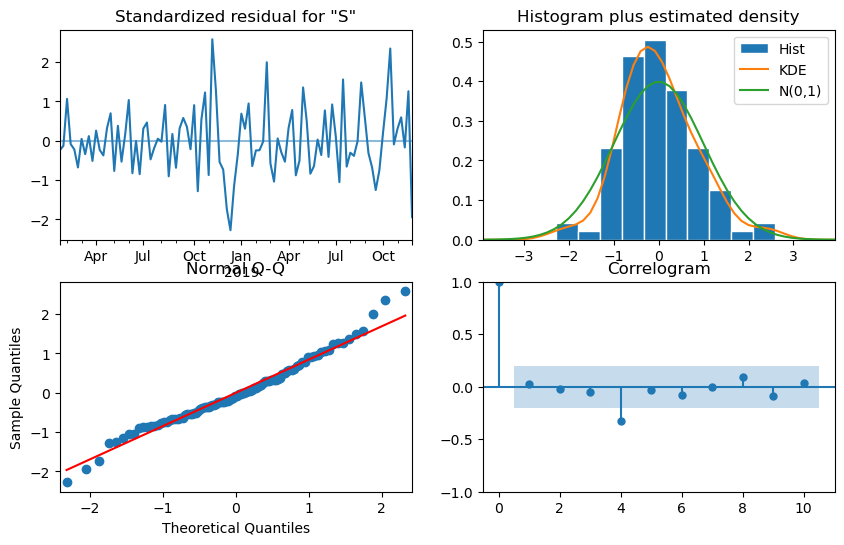

In [43]:
model_auto_arima.plot_diagnostics(figsize=(10, 6))
plt.show()

### Model iterations using WFV AND CV

### Work forward validation

In [46]:
X = (data.SALES.values).tolist() # convert y_target to a list for ease of iteration and compilation
X[:5]

[12133.25, 18296.39, 0.0, 0.0, 99323.95999999999]

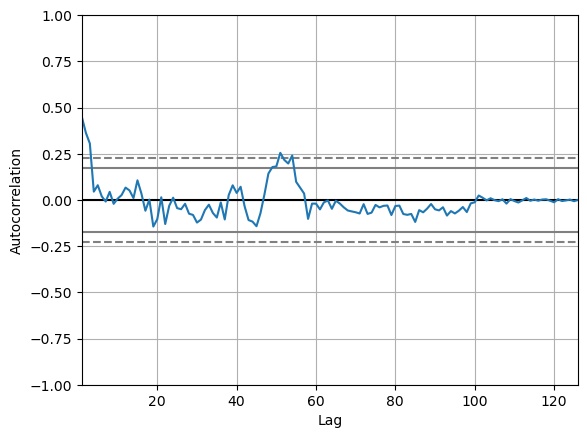

In [47]:
# Tried another approach to check autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(X)
plt.show()

### Split data

In [49]:
size = int(len(X) * 0.8) # getting index value for train, test, split
train_x, test_x = X[:size], X[size:]
print(len(train_x))
print(len(test_x))

100
26


In [50]:
history = [x for x in train_x] # listing the training data values using list comprehension
pred_wfv = list()
for v in test_x:
  # ceate model using same custom params as above
  model_wfv = SARIMAX(history, order=(4, 0, 0,),
                  seasonal_order=(1, 1, 2, 12)).fit(disp=0, maxiter=2000)
  # forecast next values
  response = model_wfv.forecast()
  pred = response[0]
  # append forecast and history to prediction and history list above
  pred_wfv.append(pred)
  history.append(v)
  print('predicted=%.3f, expected=%.3f' % (pred, v))

predicted=101025.510, expected=136765.080
predicted=133171.905, expected=156425.910
predicted=102989.353, expected=37905.150
predicted=30364.065, expected=0.000
predicted=73621.093, expected=13529.570
predicted=51673.551, expected=125613.750
predicted=77298.491, expected=15702.090
predicted=73251.658, expected=135642.610
predicted=103543.177, expected=70785.430
predicted=82509.938, expected=90027.420
predicted=128749.675, expected=90135.870
predicted=66864.876, expected=96990.760
predicted=61806.386, expected=58914.200
predicted=81566.485, expected=134473.260
predicted=106799.597, expected=66289.270
predicted=31577.724, expected=20321.530
predicted=100375.440, expected=47333.910
predicted=110271.183, expected=136074.910
predicted=74296.965, expected=54869.610
predicted=106236.452, expected=61693.220
predicted=78893.978, expected=61024.620
predicted=72634.738, expected=85980.710
predicted=111812.995, expected=135853.390
predicted=96238.321, expected=91297.000
predicted=74035.596, expect

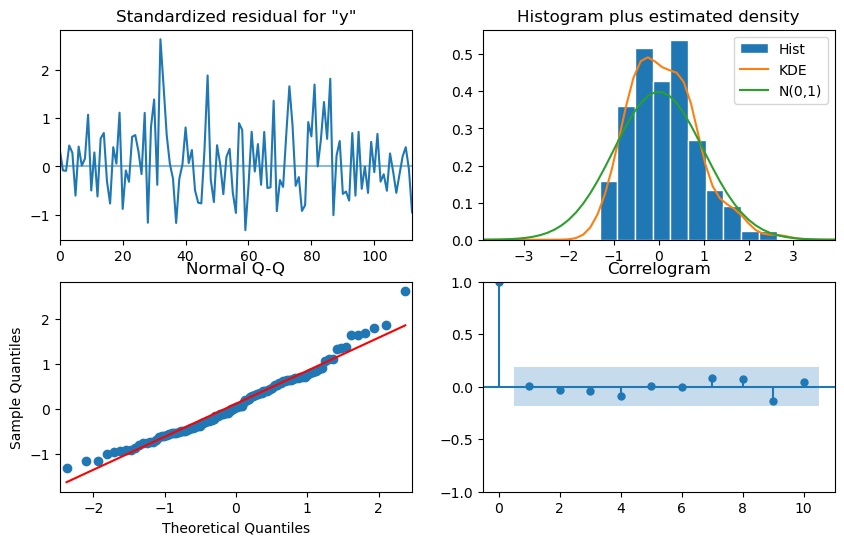

In [51]:
model_wfv.plot_diagnostics(figsize=(10, 6))
plt.show()

### Cross Validation

In [53]:
data.head() # Just checking to be sure I'm still using the same dataset

SALES
ORDERDATE           
2018-01-07 12,133.25
2018-01-14 18,296.39
2018-01-21      0.00
2018-01-28      0.00
2018-02-04 99,323.96

For Cross Validation, a different split method will be used, to avoid data leakage

In [55]:
from sklearn.model_selection import TimeSeriesSplit # importing library
tss = TimeSeriesSplit(n_splits=4) # spliting the data into 4 different parts

# using a for loop to split the data into various train test split
for train_index, test_index in tss.split(data):
  train_cv = data.iloc[train_index]
  test_cv = data.iloc[test_index][:].squeeze()
  print(train_cv.shape, test_cv.shape)


(26, 1) (25,)
(51, 1) (25,)
(76, 1) (25,)
(101, 1) (25,)


In [56]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=4)
for train_index, test_index in tss.split(data):
    train_cv = data.iloc[train_index]
    test_cv = data.iloc[test_index][:].squeeze()
    global model_cv
    try:
      model_cv = SARIMAX(train_cv, order=(4, 0, 0), seasonal_order=(1, 1, 2, 12)).fit(disp=0, maxiter=2000)
      pred = model_cv.forecast(len(test_cv))
    except Exception as e:
      print(f"there is an error: {str(e)}")
      continue
pred_cv = pred

pred_cv.head()

2019-12-15   133,171.91
2019-12-22    91,274.46
2019-12-29    46,569.90
2020-01-05   102,935.54
2020-01-12   123,069.23
Freq: W-SUN, Name: predicted_mean, dtype: float64

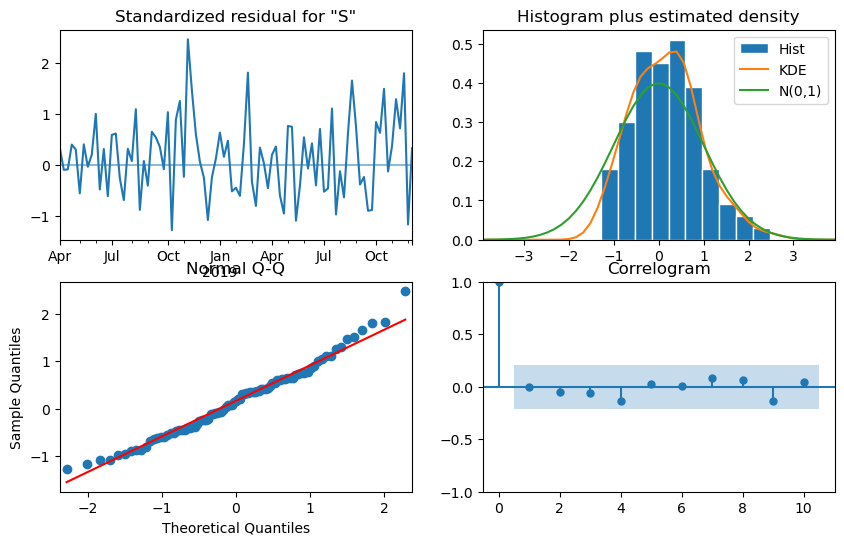

In [57]:
model_cv.plot_diagnostics(figsize=(10, 6))
plt.show()

In [58]:
pred_cv_df = pred_cv.to_frame()
pred_cv_df.columns = ['cv_pred']
pred_cv_df.index.name = 'ORDERDATE'
pred_cv_df.head()

cv_pred
ORDERDATE            
2019-12-15 133,171.91
2019-12-22  91,274.46
2019-12-29  46,569.90
2020-01-05 102,935.54
2020-01-12 123,069.23

## Model Evaluation

All the models seems to pass residual test except autoarima model which has correlations in its residuals

To choose the best model, I will be considering `MAPE` metric of their predictions

In [60]:
# Converting the target data (y_test) to a dataframe
test_pred_data = y_test.copy().to_frame()
test_pred_data.rename(columns={'SALES': 'Actual'}, inplace=True)
test_pred_data.head()

Actual
ORDERDATE            
2019-12-08 136,765.08
2019-12-15 156,425.91
2019-12-22  37,905.15
2019-12-29       0.00
2020-01-05  13,529.57

In [61]:
# Creating a column for each model in the test dataset
test_pred_data['wfv_pred'] = pred_wfv
test_pred_data['auto_arima_pred'] = pre_auto_arima
test_pred_data['cus_loop_pred'] = pred_cus_loop
print(test_pred_data.shape)
test_pred_data.tail()

(26, 4)


Actual   wfv_pred  auto_arima_pred  cus_loop_pred
ORDERDATE                                                       
2020-05-03  85,980.71  72,634.74       246,534.34     117,868.80
2020-05-10 135,853.39 111,812.99       248,709.36     145,511.34
2020-05-17  91,297.00  96,238.32       250,884.38      94,791.35
2020-05-24       0.00  74,035.60       253,059.41      61,633.89
2020-05-31 144,729.96  75,432.69       255,234.44      77,549.36

Because a different split method was used for cross validation iterations, it has a different data length and thus the merging option used

In [63]:
test_pred_merge = pd.merge(test_pred_data, pred_cv_df, how='left', left_index=True, right_index=True)
test_pred_merge.head(10)

Actual   wfv_pred  auto_arima_pred  cus_loop_pred    cv_pred
ORDERDATE                                                                  
2019-12-08 136,765.08 101,025.51       208,154.42     101,025.51        NaN
2019-12-15 156,425.91 133,171.91       216,747.94     116,201.56 133,171.91
2019-12-22  37,905.15 102,989.35       196,128.81      72,442.98  91,274.46
2019-12-29       0.00  30,364.06       208,901.25      26,712.64  46,569.90
2020-01-05  13,529.57  73,621.09       210,950.46      95,972.25 102,935.54
2020-01-12 125,613.75  51,673.55       210,624.21     116,585.88 123,069.23
2020-01-19  15,702.09  77,298.49       214,163.32      89,493.49  92,119.35
2020-01-26 135,642.61  73,251.66       216,217.27     108,891.86 107,617.88
2020-02-02  70,785.43 103,543.18       218,126.25      87,122.34  85,821.94
2020-02-09  90,027.42  82,509.94       220,472.47      96,386.26  93,098.91

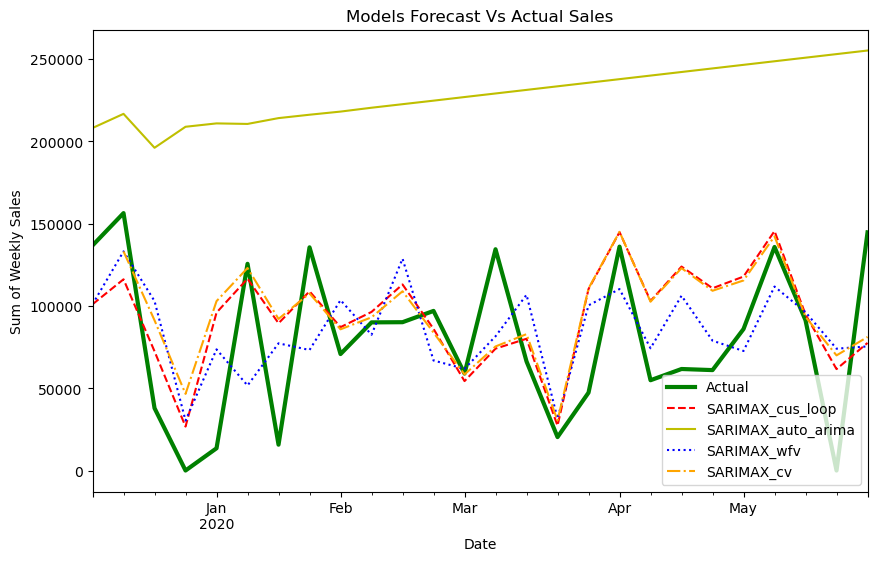

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
test_pred_merge['Actual'].plot(ax=ax, label='Actual', color='g', linewidth=3)
test_pred_merge['cus_loop_pred'].plot(ax=ax, label='SARIMAX_cus_loop', color='r', linestyle= '--')
test_pred_merge['auto_arima_pred'].plot(ax=ax, label='SARIMAX_auto_arima', color='y', linestyle= '-')
test_pred_merge['wfv_pred'].plot(ax=ax, label='SARIMAX_wfv', color='b', linestyle= ':')
test_pred_merge['cv_pred'].plot(ax=ax, label='SARIMAX_cv', color='orange', linestyle= '-.')

plt.xlabel('Date')
plt.ylabel('Sum of Weekly Sales')
plt.title('Models Forecast Vs Actual Sales')
plt.legend()
plt.show();

In [115]:
from sklearn.metrics import mean_absolute_percentage_error

cus_loop_mape = mean_absolute_percentage_error(test_pred_merge.Actual, test_pred_merge.cus_loop_pred)

auto_arima_mape = mean_absolute_percentage_error(test_pred_merge.Actual, test_pred_merge.auto_arima_pred)

wfv_mape = mean_absolute_percentage_error(test_pred_merge.Actual, test_pred_merge.wfv_pred)

cv_mape = mean_absolute_percentage_error(test_cv, pred_cv_df)


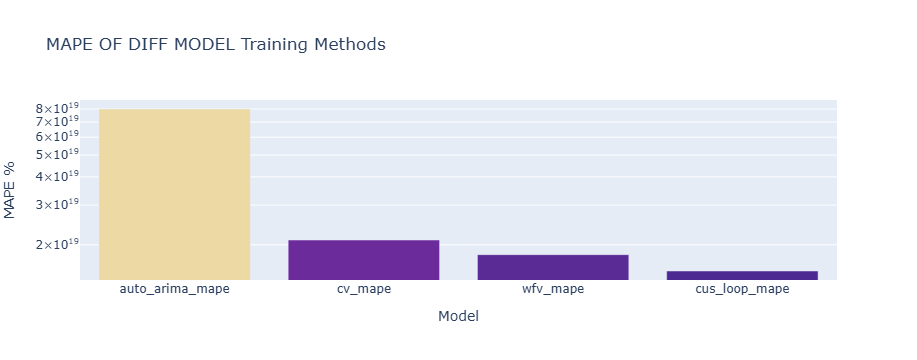

<Figure size 1000x600 with 0 Axes>

In [66]:
fig = plt.figure(figsize=(10, 6))
x_axis = ['cus_loop_mape', 'auto_arima_mape', 'wfv_mape', 'cv_mape']
y_axis = [cus_loop_mape, auto_arima_mape, wfv_mape, cv_mape]

fig = px.bar(x=x_axis, y=y_axis, title='MAPE OF DIFF MODEL Training Methods', color=y_axis, color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Model',
                  yaxis_title='MAPE %',
                  yaxis=dict(type='log'),
                  xaxis={'categoryorder':'total descending'},
                  coloraxis_showscale=False)
fig.show()


### Communication

After all is said and done, `SARIMAX` using custom loop gives the lowest Mean Absolute Percentage Error and as a result of this metric, `SARIMAX` using custom loop will be adopted

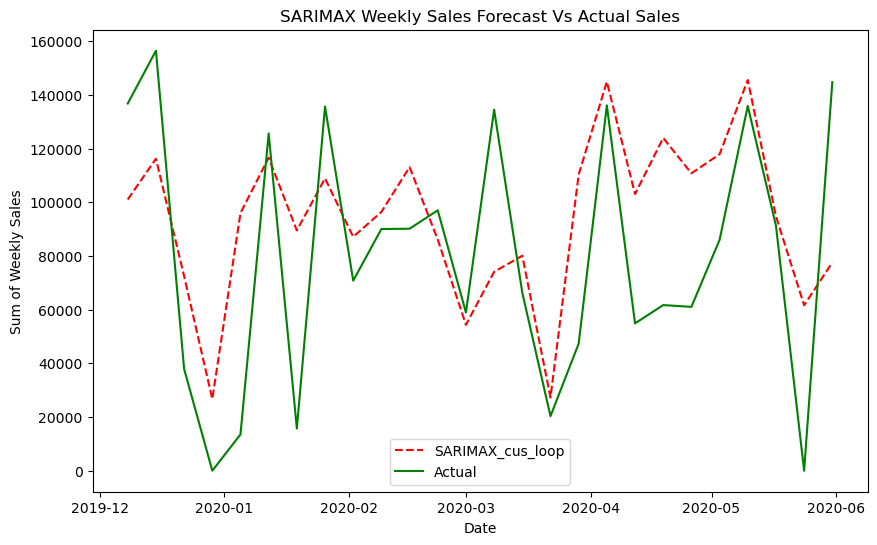

In [68]:
plt.figure(figsize=(10, 6))

plt.plot(test_pred_merge.cus_loop_pred, label = 'SARIMAX_cus_loop', color='r', linestyle= '--')
plt.plot(test_pred_merge.Actual, label='Actual', color='g')

plt.xlabel('Date')
plt.ylabel('Sum of Weekly Sales')
plt.title('SARIMAX Weekly Sales Forecast Vs Actual Sales')
plt.legend()
plt.show();

Function for Training and making Predictions

In [70]:
def Auto_Sales_weekly_prediction(data, h, s, p=4, d=0, q=0) -> pd.DataFrame:

  """
  Docstring: Train and predict using SARIMAX model


  parameters:
  ----------
    data: Feature dataset (dataframe)
    h: Number of days to be predicted (int)
    s: seasonality (int)
    p, d, q: order of the model (int)

  return:
  ------
    prediction (dataframe)
    fitted model (object)

  """

  param_order = (p, d, q)
  s_order = (1, 1, 2, 12)

  model_autoar = SARIMAX(data, order=param_order, seasonal_order=s_order).fit(disp=0, maxiter=2000)
  start = len(data)
  end = start + h
  pred_arim = model_autoar.predict(start, end).to_frame()
  pred_arim.columns = ['SALES_predicted']
  pred_arim.index.name = 'ORDERDATE'

  return pred_arim.tail(h), model_autoar


In [71]:
two_weeks_pred = Auto_Sales_weekly_prediction(data=data, h=5, s=12)
two_weeks_pred

(            SALES_predicted
 ORDERDATE                  
 2020-06-14        24,380.17
 2020-06-21       106,956.20
 2020-06-28       148,961.40
 2020-07-05        89,477.37
 2020-07-12       128,460.21,
 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2ba148576d0>)